### Foreground Extraction using GrabCut Algorithm

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Grab cut is a technique that is used to extract the foreground of the image by defining a rectangular region outside of which everything is considered background
# Then GrabCut extracts the foreground from the image inside the rectangle

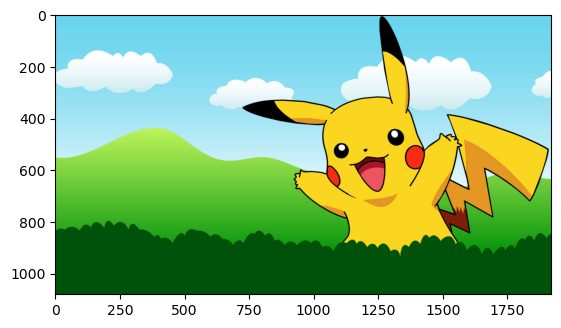

In [ ]:
# Loading the image 
img = cv2.imread("assets/pikachu.jpg")
assert img is not None, "File not found" #Checks if the file exists 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [59]:
# Defining the rectangle 
h, w = img.shape[:2]
rect = (650, 0, 1300 , 950) # (x, y, width, height)

In [63]:
# creating a mask, bgdModel and fgdModel
mask = np.zeros(img.shape[:2], np.uint8) # it is a mask image which stores the GrabCut Results
# Area Types:
# background, foreground or probable background/foreground
# It is done by the following flags, cv.GC_BGD, cv.GC_FGD, cv.GC_PR_BGD, cv.GC_PR_FGD, or simply pass 0,1,2,3 to image.

bgdModel = np.zeros((1,65), np.float64) # used by the algorithm internally
fgdModel = np.zeros((1,65), np.float64)


In [64]:
# GrabCut with rectangle mode
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT) # 5 defines the number of iteration

(array([[0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 2.92071986e-01,  2.92487876e-01,  1.83600935e-01,
          1.07353840e-01,  1.24485362e-01,  1.15964621e+02,
          2.15048831e+02,  2.38470593e+02,  7.19578701e-03,
          8.09790139e+01,  8.97982469e+00,  1.06620787e+02,
          2.01415008e+02,  5.61920660e+01,  2.35251422e+02,
          2.47152040e+02,  2.49566197e+02,  1.60943657e+02,
          2.27868293e+02,  2.43663422e+02,  6.26990810e+01,
          1.89237519e+01,  9.67487816e+00,  1.89237519e+01,
          6.20708162e+00,  3.15738610e+00,  9.67487816e+00,
          3.15738610e+00,  2.50333055e+00,  2.81054338e-02,
         -4.17631817e-03,  2.19001114e-02, -4.17631817e-03,
          2.64295546e-01,  1.43504661e-01,  2.19001114e-02,
          1.43504661e-01,  2.43143240e-01,  1.37832747

In [ ]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8') # Pixels with value 0 or 2 (definite/probable background) → 0 (background)
mask2 = mask2[:, :, np.newaxis] # adding the channel axis
result = img*mask2 # Multiplies image by mask (background pixels become black, foreground preserved)

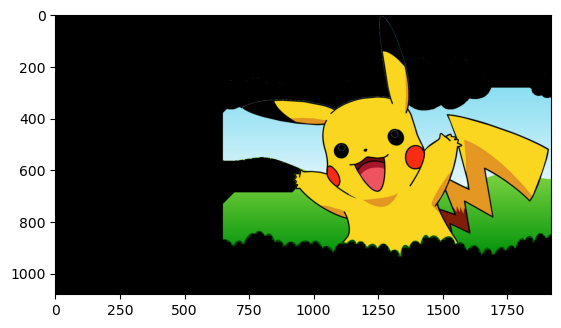

In [77]:
# Displaying the end result
plt.imshow(result)